In [1]:
API_TOKEN = 'pk.eyJ1IjoibG9raXByZXNpZGVudCIsImEiOiJjamZyYmRiaXEwN3gzMzJycjc5eG4yYnd4In0.8S8l9kH4Ws_ES_ZCjw2i8A'



In [2]:
import geopandas as gpd
import pandas as pd
import os
from mapboxgl.utils import *
from mapboxgl.viz import *

In [4]:
tracts = gpd.read_file(r'C:\Packt\PythonScripting\Chapters\Chapter14\Data\tracts_bayarea.geojson')

In [18]:
tracts.describe()

,ALAND,AWATER,ACS_15_5YR_S0101_with_ann_Total; Estimate; Total population,ACS_15_5YR_S0101_with_ann_Total; Margin of Error; Total population,ACS_15_5YR_S0101_with_ann_Male; Estimate; Total population,ACS_15_5YR_S0101_with_ann_Male; Margin of Error; Total population,ACS_15_5YR_S0101_with_ann_Female; Estimate; Total population,ACS_15_5YR_S0101_with_ann_Female; Margin of Error; Total population
count,1.624000e+03,1.624000e+03,1624.00000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,1.184594e+07,8.263765e+05,4717.49569,375.815271,2338.909483,264.705665,2378.586207,255.890394
std,6.248955e+07,8.032388e+06,1783.97848,151.386849,906.583010,106.223538,917.448506,101.762389
min,5.656400e+04,0.000000e+00,0.00000,11.000000,0.000000,9.000000,0.000000,9.000000
25%,9.124378e+05,0.000000e+00,3440.25000,267.000000,1691.750000,188.000000,1744.250000,182.000000
50%,1.590814e+06,0.000000e+00,4545.50000,353.000000,2257.500000,249.000000,2297.000000,243.500000
75%,3.413130e+06,0.000000e+00,5831.50000,463.000000,2910.500000,324.250000,2955.000000,312.000000
max,1.529070e+09,2.475013e+08,13467.00000,1070.000000,6746.000000,942.000000,6847.000000,869.000000


In [19]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,ACS_15_5YR_S0101_with_ann_Id,...,ACS_15_5YR_S0101_with_ann_Male; Margin of Error; PERCENT IMPUTED - Sex,ACS_15_5YR_S0101_with_ann_Female; Estimate; PERCENT IMPUTED - Sex,ACS_15_5YR_S0101_with_ann_Female; Margin of Error; PERCENT IMPUTED - Sex,ACS_15_5YR_S0101_with_ann_Total; Estimate; PERCENT IMPUTED - Age,ACS_15_5YR_S0101_with_ann_Total; Margin of Error; PERCENT IMPUTED - Age,ACS_15_5YR_S0101_with_ann_Male; Estimate; PERCENT IMPUTED - Age,ACS_15_5YR_S0101_with_ann_Male; Margin of Error; PERCENT IMPUTED - Age,ACS_15_5YR_S0101_with_ann_Female; Estimate; PERCENT IMPUTED - Age,ACS_15_5YR_S0101_with_ann_Female; Margin of Error; PERCENT IMPUTED - Age,geometry
0,06,013,359103,1400000US06013359103,06013359103,3591.03,CT,2593523,1170833,1400000US06013359103,...,(X),(X),(X),1.5,(X),(X),(X),(X),(X),"(POLYGON ((-122.302287 37.995278, -122.299658 ..."
1,06,087,122500,1400000US06087122500,06087122500,1225,CT,12156088,909650,1400000US06087122500,...,(X),(X),(X),2.6,(X),(X),(X),(X),(X),"(POLYGON ((-121.769407 36.941061, -121.765421 ..."
2,06,001,421500,1400000US06001421500,06001421500,4215,CT,1590680,3635,1400000US06001421500,...,(X),(X),(X),1.4,(X),(X),(X),(X),(X),"(POLYGON ((-122.267737 37.893131, -122.262683 ..."
3,06,013,366001,1400000US06013366001,06013366001,3660.01,CT,1017166,0,1400000US06013366001,...,(X),(X),(X),0.8,(X),(X),(X),(X),(X),"(POLYGON ((-122.353307 37.978544, -122.352953 ..."
4,06,001,422000,1400000US06001422000,06001422000,4220,CT,4498259,5864363,1400000US06001422000,...,(X),(X),(X),2.2,(X),(X),(X),(X),(X),"(POLYGON ((-122.325193 37.874276, -122.318663 ..."


In [20]:
tracts.geometry.name

'geometry'

In [21]:
tracts.plot()

In [26]:
tracts['centroids'] = tracts.centroid
tract_points = tracts
tract_points = tract_points.set_geometry('centroids')


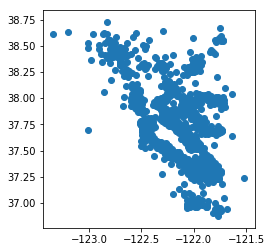

In [34]:
tract_points.plot()

In [52]:
tract_points['Total Population'] = tract_points['ACS_15_5YR_S0101_with_ann_Total; Estimate; Total population']
tract_points['Male Population'] = tract_points['ACS_15_5YR_S0101_with_ann_Male; Estimate; Total population']
tract_points['Female Population'] = tract_points['ACS_15_5YR_S0101_with_ann_Female; Estimate; Total population']
tract_points = tract_points[['Total Population','Male Population','Female Population','centroids' ]]


In [53]:
tract_points[:5]

,Total Population,Male Population,Female Population,centroids
0,4893,2395,2498,POINT (-122.2925253413085 38.00295823758501)
1,6444,3097,3347,POINT (-121.7468504262252 36.95049874202599)
2,3736,1757,1979,POINT (-122.2594490259385 37.8916373721222)
3,4347,2301,2046,POINT (-122.3459716556987 37.97616227082723)
4,1952,984,968,POINT (-122.303938838024 37.8657801574032)


In [62]:
tract_points.to_file('tract_points.geojson',driver="GeoJSON")

In [69]:
viz = CircleViz('tract_points.geojson', access_token=API_TOKEN, 
                radius = 2, center = (-122, 37.75), zoom = 8)
viz.show()

In [80]:
color_stops = [
    [1.0, 'rgb(255,255,204)'],
    [500.0, 'rgb(255,237,160)'],
    [1000.0, 'rgb(252,78,42)'],
    [2500.0, 'rgb(227,26,28)'],
    [5000.0, 'rgb(189,0,38)'],
    [max(tract_points['Total Population']),'rgb(128,0,38)']
]
viz.color_property = 'Total Population'
viz.color_function_type = 'interpolate'
viz.color_stops = color_stops
viz.radius = 1
viz.center = (-122, 37.75)
viz.zoom = 8


viz.show() 

In [131]:
radius_stops = [
    [0.0, 1.0],
    [1000.0, 3.0],
    [3000.0, 5.0],
    [5000.0, 8.0],
    [8000.0, 10.0],
    [max(tract_points['Total Population']), 15.0],   
]


minmax = [min(tract_points['Percent Male']),
          max(tract_points['Percent Male'])]

diff = minmax[1] - minmax[0]


color_stops = [
    [round(minmax[0],2), 'rgb(107,174,214)'],
    [round(minmax[0]+(diff/6.0),2), 'rgb(116,196,118)'],
    [round(minmax[1]-(diff/2.0),2), 'rgb(254,153,41)'],
    [minmax[1], 'rgb(222,45,38)'],

]

# Initialize Graduated Circle Visualization 
vizGrad = GraduatedCircleViz('tract_points2.geojson', access_token=API_TOKEN)

# Marker color-related attributes
vizGrad.color_function_type = 'interpolate'
vizGrad.color_stops = color_stops
vizGrad.color_property = 'Percent Male'
vizGrad.color_default = 'grey'
vizGrad.opacity = 0.75

# Marker radius-related attributes
vizGrad.radius_property = 'Total Population'
vizGrad.radius_stops = radius_stops
vizGrad.radius_function_type = 'interpolate'
vizGrad.radius_default = 1

# Set center, zoom and render map
vizGrad.center = (-122, 37.75)
vizGrad.zoom = 12
vizGrad.show()

In [104]:
tract_points['Percent Male'] = tract_points['Male Population']/tract_points['Total Population']

In [86]:
tract_points['Percent Female'] = tract_points['Female Population']/tract_points['Total Population']

In [88]:
tract_points[:5]

,Total Population,Male Population,Female Population,centroids,Percent Male,Percent Female
0,4893,2395,2498,POINT (-122.2925253413085 38.00295823758501),0.489475,0.510525
1,6444,3097,3347,POINT (-121.7468504262252 36.95049874202599),0.480602,0.519398
2,3736,1757,1979,POINT (-122.2594490259385 37.8916373721222),0.470289,0.529711
3,4347,2301,2046,POINT (-122.3459716556987 37.97616227082723),0.529331,0.470669
4,1952,984,968,POINT (-122.303938838024 37.8657801574032),0.504098,0.495902


In [90]:
tract_points.to_file('tract_points2.geojson',driver="GeoJSON")

In [138]:

color_stops2 = [
    [0.0, 'rgb(107,174,214)'],

    [3000.0, 'rgb(116,196,118)'],

    [8000.0, 'rgb(254,153,41)'],
    [max(tract_points['Total Population']), 'rgb(222,45,38)'],   
]

minmax = [min(tract_points['Percent Male']),
          max(tract_points['Percent Male'])]

diff = minmax[1] - minmax[0]

radius_stops2 = [
    [round(minmax[0],2), 2.0],
    [round(minmax[0]+(diff/6.0),2), 4.0],
    [round(minmax[1]-(diff/2.0),2), 8.0],
    [minmax[1], 15.0],

]






# Initialize Graduated Circle Visualization 
vizGrad = GraduatedCircleViz('tract_points2.geojson', access_token=API_TOKEN)

# Marker color-related attributes
vizGrad.color_function_type = 'interpolate'
vizGrad.color_stops = color_stops2
vizGrad.color_property = 'Total Population'
vizGrad.color_default = 'grey'
vizGrad.opacity = 0.75

# Marker radius-related attributes
vizGrad.radius_property = 'Percent Male'
vizGrad.radius_stops = radius_stops2
vizGrad.radius_function_type = 'interpolate'
vizGrad.radius_default = 1

# Set center, zoom and render map
vizGrad.center = (-122, 37.75)
vizGrad.zoom = 9
vizGrad.show()

In [199]:
measure_color = 'Percent Male'
color_breaks = [round(tract_points[measure_color].quantile(q=x*0.1),3) for x in range(1, 11,3)]

color_stops = create_color_stops(color_breaks, colors='YlOrRd')

measure_radius = 'Total Population'
radius_breaks = [round(tract_points[measure_radius].quantile(q=x*0.1),1) for x in range(2, 12,2)]

radius_stops = create_radius_stops(radius_breaks, 5.0, 20)


vizGrad = GraduatedCircleViz('tract_points2.geojson', 
                          access_token=API_TOKEN,
                          color_property = measure_color,
                          color_stops = color_stops,
                          radius_property = measure_radius,
                          radius_stops = radius_stops,
                          stroke_color = 'black',
                          stroke_width = 0.5,
                          center = (-122, 37.75),
                          zoom = 9,
                          opacity=0.75)
vizGrad.style='mapbox://styles/mapbox/dark-v9'
vizGrad.show()

In [5]:
tract_poly = tracts
tract_poly['Total Population'] = tract_poly['ACS_15_5YR_S0101_with_ann_Total; Estimate; Total population']
tract_poly['Male Population'] = tract_poly['ACS_15_5YR_S0101_with_ann_Male; Estimate; Total population']
tract_poly['Female Population'] = tract_poly['ACS_15_5YR_S0101_with_ann_Female; Estimate; Total population']
tract_poly = tract_poly[['Total Population','Male Population','Female Population','geometry' ]]

In [7]:
tract_poly.to_file('tracts_bayarea2.geojson', driver="GeoJSON")

In [230]:
vizCloro = ChoroplethViz('tracts_bayarea2.geojson', 
    access_token=API_TOKEN,
    color_property='Male Population',
    color_stops=create_color_stops([0, 2000, 3000,5000,7000, 15000], colors='YlOrRd'),
    color_function_type='interpolate',
    line_stroke='-',
    line_color='rgb(128,0,38)',
    line_width=1,
    opacity=0.6,
    center=(-122, 37.75),
    zoom=9,
    below_layer='waterway-label'
                    )
vizCloro.style='mapbox://styles/lokipresident/cjftywpln8yw22sp9fcpqa8rl'
vizCloro.show()

In [233]:
with open('mpop.html', 'w') as f:
    f.write(vizCloro.create_html())

In [8]:
#Create a heatmap 
measure = 'Female Population'
heatmap_color_stops = create_color_stops([0.01, 0.25, 0.5, 0.75, 1], colors='PuRd')
heatmap_radius_stops = [[0, 3], [14, 100]] #increase radius with zoom



color_breaks = [round(tract_poly[measure].quantile(q=x*0.1), 2) for x in range(2,10)]
color_stops = create_color_stops(color_breaks, colors='Spectral')

heatmap_weight_stops = create_weight_stops(color_breaks)

#Create a heatmap 
viz3 = HeatmapViz('tracts_bayarea2.geojson', 
                  access_token=API_TOKEN,
                  weight_property = "Female Population",
                  weight_stops = heatmap_weight_stops,
                  color_stops = heatmap_color_stops,
                  radius_stops = heatmap_radius_stops,
                  opacity = 0.8,
                center=(-122, 37.78),
                zoom=7,
                  below_layer='waterway-label'
                 )

viz3.show()

In [242]:
#Create a heatmap 
measure = 'Female Population'
color_stops = create_color_stops([0, 2000, 3000,5000,], colors='RdPu')
radius_stops = [[0, 3],  [14, 100]] #increase radius with zoom



color_breaks = [round(tract_points[measure].quantile(q=x*0.1), 2) for x in range(2,10)]
print(color_breaks)
color_stops = create_color_stops(color_breaks, colors='Spectral')

weight_stops = create_weight_stops(color_breaks)

viz3 = HeatmapViz('tracts_points2.geojson', 
                  access_token=API_TOKEN,
                  weight_property = "Total Population",
                  weight_stops = weight_stops,
                  color_stops = color_stops,
 
                  opacity = 0.8,
                center=(-122, 37.78),
                zoom=7,
                  below_layer='waterway-label'
                 )

viz3.show()

,Total Population,Male Population,Female Population,geometry
0,4893,2395,2498,"(POLYGON ((-122.302287 37.995278, -122.299658 ..."
1,6444,3097,3347,"(POLYGON ((-121.769407 36.941061, -121.765421 ..."
2,3736,1757,1979,"(POLYGON ((-122.267737 37.893131, -122.262683 ..."
3,4347,2301,2046,"(POLYGON ((-122.353307 37.978544, -122.352953 ..."
4,1952,984,968,"(POLYGON ((-122.325193 37.874276, -122.318663 ..."


In [251]:
tract_poly["Female Population"]/(tract_poly.geometry.area * 10000)

0         949.252328
1         253.151830
2        1250.727416
3        1971.972441
4         172.493402
5        2296.172783
6        4816.202623
7        2166.245370
8         427.246671
9        2766.673908
10       2557.794201
11       3439.677822
12       3322.076612
13       1545.466126
14       2080.017205
15        861.312600
16       1453.646280
17       1526.155603
18       1213.027562
19          7.244429
20       1709.102338
21        400.481877
22       5299.294182
23       1680.363302
24       6808.456486
25        877.524425
26       3441.093666
27        563.242203
28       2936.626795
29       1224.186768
            ...     
1594       37.806359
1595     8056.456719
1596      671.794967
1597     9146.983459
1598     1297.232686
1599    11951.445037
1600    11134.108704
1601     9853.864884
1602     1764.052650
1603     1051.499714
1604     1850.974558
1605       15.551311
1606      894.005340
1607     2020.468843
1608     1519.371952
1609     3203.356718
1610      636

In [297]:
token = 'sk.eyJ1IjoibG9raXByZXNpZGVudCIsImEiOiJjamZ1bnI0bHAwYWhjMndxYmlja3oxZGdqIn0.Y-qlJfzFzr3MGkOPPbtZ5g'
from mapbox import Uploader
import uuid
set_id = uuid.uuid4().hex
service = Uploader(access_token=token)
with open('ztca_bayarea.geojson', 'rb') as src:
    response = service.upload(src, set_id)
print(set_id, response)

<Response [201]>


In [294]:
datasets = Datasets(access_token=token)

'eda1891522314bdaa706254c91f3493e'

In [306]:
from mapbox import Datasets
import json
datasets = Datasets(token)


In [ ]:
create_resp = datasets.create(name="Bay Area Zips", description = "ZTCA zones for the Bay Area")


In [331]:
listing_resp = datasets.list()
dataset_id = [ds['id'] for ds in listing_resp.json()][0]
data = json.load(open(r'C:\Packt\PythonScripting\Chapters\Chapter14\Scripts\ztca_bayarea.geojson'))
for count,feature in enumerate(data['features']):
    pass
    #resp = datasets.update_feature(dataset_id, count, feature)
print(resp)# Create the viz


KeyboardInterrupt: 

In [329]:
resp = datasets.delete_feature(dataset_id, 0)

In [327]:
[ds['id'] for ds in listing_resp.json()]

['cjfuoyv0f08nt2qqu0ncfrzad']